# [Adult Dataset](https://bit.ly/3rvRB8j)

### Celem jest zrobić predykcję, czy dana osoba osiągnie przychód ponad 50 tysięcy (dolarów) w rok.

Innymi słowy, z punktu widzenia uczenie maszynowego należy wykonać klasyfikację binarną. W praktyce to oznacza, że są dwie możliwe odpowiedzi: np. "tak" czy "nie" lub "kot" czy "pies" itd.


In [2]:
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#models
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import LabelEncoder

import qgrid

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Wczytujemy dane
Dane są przechowywane w formacie [HDF5](https://bit.ly/3w6jbwk). To jest binarny format, który jest dość wygodny (zwykle trzymamy dane w tym formacie zamiast .csv). Między innymi umożliwia to zapisanie więcej niż jeden zbiór danych do jednego pliku.

In [3]:
train = pd.read_hdf('train.adult.h5')

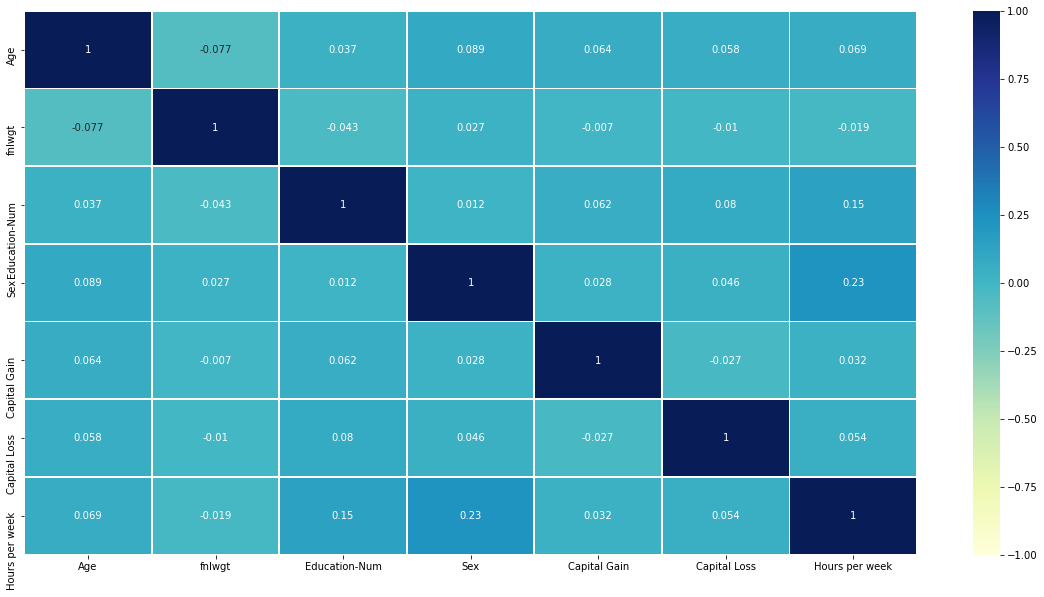

In [4]:
plt.rcParams['figure.figsize']=(20,10)
sns.heatmap(train.corr(), vmax=1., vmin=-1., annot=True, linewidths=.8, cmap="YlGnBu");

Mówiąc o korelacji, przede wszystkim chodzi o korelację liniową (domyślnie `pd.corr()` używa [Pearsona](https://bit.ly/3lZa1gq)). 

Po drugie, chodzi o korelację pomiędzy zmiennymi ciągłymi (numerycznymi).

Co zrobić ze zmiennymi kategorialnymi (albo jeszcze ciekawszą kombinacją: zmienna kategorialna i zmienna ciągła)? To jest większa "rozkmina", która wykracza poza ten kurs. Natomiast na tej [stronie](https://bit.ly/2PxcORX) można zobaczyć różne kombinacje i inspiracje, jak sobie z tym radzić.

## Popatrz na dane
Pierwsze 5 czy 10 wierszy

*Inaczej mówiąc*: funkcja `.head()` domyślnie pokazuje tylko pierwsze **5 wierszy**, ale możesz to zmienić przekazują parametr, np. pokazać pierwsze **20 wierszy** `.head(20)`. 

Możesz również spróbować użyć funkcji `.sample(10)`. Ta funkcja będzie losować `n` wierszy, gdzie `n` podajesz jako argument. Jeśli zbiór danych jest relatywnie mały (mniej niż milion), to może być to lepszą opcją, bo po uruchomieniu za każdym razem możesz zobaczyć coś więcej niż tylko pierwsze 10 wierszy. 

W ten sposób możesz "wyłapać" ciekawsze przypadki mniejszym kosztem (spróbuj kilka razy uruchomić tę linijkę).

In [5]:
train.sample(10)

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
651,24,Private,556660,HS-grad,9,Never-married,Exec-managerial,Other-relative,White,True,4101,0,50,United-States,<=50K
3694,37,Local-gov,31023,Some-college,10,Married-civ-spouse,Other-service,Husband,White,True,0,0,40,United-States,<=50K
4151,46,State-gov,106705,Some-college,10,Divorced,Prof-specialty,Unmarried,White,False,1506,0,50,United-States,<=50K
31637,31,Local-gov,156464,Bachelors,13,Never-married,Prof-specialty,Other-relative,White,True,0,0,40,NaN,<=50K
22735,43,Local-gov,216070,Masters,14,Married-civ-spouse,Exec-managerial,Wife,Amer-Indian-Eskimo,False,0,0,50,United-States,>50K
17215,43,Private,206878,HS-grad,9,Never-married,Adm-clerical,Unmarried,White,False,0,0,60,United-States,<=50K
26633,43,Private,33310,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,False,0,0,40,United-States,<=50K
4768,40,Federal-gov,298635,Masters,14,Married-civ-spouse,Tech-support,Husband,Asian-Pac-Islander,True,0,1902,40,Philippines,>50K
5581,44,Private,169397,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,True,0,0,40,United-States,>50K
977,40,State-gov,188693,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,True,0,0,35,United-States,>50K


### Oficjalny opis danych

- **Age** – Wiek osoby.
- **Workclass** – Rodzaj pracodawcy, jaki ma dana osoba. Niezależnie od tego, czy są to instytucje rządowe, wojskowe, prywatne i inne.
- **fnlwgt** – Pewna liczba (mało istotna jaka). Będziemy ignorować tę zmienną.
- **Education** – Najwyższy poziom wykształcenia osiągnięty dla tej osoby.
- **Education-Num** – Najwyższy poziom wykształcenia w formie liczbowej.
- **Marital** – Stan cywilny osoby.
- **Occupation** – Wykonywany zawód.
- **Relationship** – Trochę trudniejsze do wytłumaczenia. Zawiera wartości związane z rodziną, takie jak mąż, ojciec itd.
- **Race** – opisy poszczególnych ras człowieka. 
- **Sex** – Płeć.
- **Capital Gain** – Zyski kapitałowe rejestrowane.
- **Capital Loss** – Straty kapitałowe rejestrowane.
- **Hours per week** – Liczba godzin przepracowane w tygodniu.
- **Country** – Kraj pochodzenia danej osoby.
- **Target** – Zmienna logiczna (mniejsza, równa się lub większa). Niezależnie od tego, czy dana osoba zarabia więcej niż 50 000$ rocznie.


Więcej o danych można przeczytać [tutaj](https://bit.ly/39lBFPy).

Spędź proszę chwilę czasu zastanawiając się nad danymi. Pomyśl (na razie teoretycznie), która cecha może mieć większy lub mniejszy wpływ na jakość modelu. Będzie dobrze, jeśli zanotujesz swoje pomysły, a później to będziemy weryfikować. 


## QGrid
Ciekawostką jest to, że jest narzędzie [qgrid](https://bit.ly/31rXj0j) i funkcja `.show_grid()`, które umożliwia analizowanie danych bez znajomości `pandas`. To może być krok przejściowy :). Zobacz, jak to wygląda.

In [6]:
qgrid.show_grid(train, show_toolbar=True)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

Teraz przełączamy na się kodowanie, bo jednak warto to poznać, bo daje większe możliwości.


## Braki w danych
Jest kilka cech w których są braki. Kod poniżej wypisze, które to cechy i jak dużo jest braków?

In [7]:
def check_missing():
    for column in train.columns:
        missing = column, train[column].isnull().sum()
        if missing[1] == 0: continue

        print(missing)
        
check_missing()

('Workclass', 1836)
('Occupation', 1843)
('Country', 583)


### Powstaje pytanie, co z tym robić? 
Jest wiele różnych technik, ale na początek możemy zastosować najprostszą: "olać to" :). Tylko życie jest trochę bardziej skomplikowane i później "wysypie się" kod w innym miejscu, bo oczekuje tego, że będą dane. Dlatego zróbmy coś bardzo prostego, a później (jak zbudujemy cały workflow do testowania w praktyce), będziemy patrzeć, co jest lepsze.

Na początek zamiast wszystkich brakujących wartości wstawimy: -1. 

### Dlaczego -1? 
Coś trzeba wstawić :), ale liczba ujemna dlatego, żeby nie powtarzać się. Na przykład dość częstym błędem jest wstawianie 0. Problem pojawia się wtedy, gdy jest różnica pomiędzy wartością 0, która była od samego początku i wartością 0, która pojawiła się na skutek zmiany brakującej wartości. Innymi słowy, niechcący będziemy wtedy "oszukiwać" nasz model.

Wywołajmy funkcję z pandas `.fillna()`, która wypełnia wszystkie brakujące wartości podaną przez nas.

In [8]:
train = train.fillna(-1)

Sprawdźmy na wszelki wypadek, czy to zadziała dobrze...

*Nawiasem mówiąc*, wypracuj nawyk weryfikowania wszystkiego co najmniej raz (tym bardziej tych oczywistych rzeczy), co jakiś czas wynik będzie zaskakiwać.

In [9]:
check_missing()

Wygląda, że jest OK - mam wszystkie wartości :). Na wszelki wypadek można jeszcze zobaczyć `train.info()` (ale już bez przesady).

## Metryka sukcesu


Trzeba wybrać, w jaki sposób mierzyć jakość modelu. Mówimy o klasyfikacji (binarnej), więc zwykle pierwszą rzeczą, która przychodzi do głowy to dokładność (ang. *accuracy*). Nie zawsze ta metryka jest dobra (zwłaszcza, jeśli mówimy o skrzywionych [niezbilansowanych] zbiorach danych). 

Jest tak zwana [tablica pomyłek](https://bit.ly/3w751er) ([confusion matrix](https://bit.ly/3sJrHz6)). Na razie tylko wspominam o istnieniu tej tablicy, ale jeszcze tam wrócimy :).

Dokładność (ang. *accuracy*) liczy się bardzo prosto:
$$ \frac{wszystkie\ poprawne\ odpowiedzi}{wszystkie\ odpowiedzi}$$

Pobawmy się trochę, żeby wyczuć to lepiej. W każdym wierszu są dwie listy, z lewej strony prawidłowa odpowiedź, a z prawej strony jest predykcja (czyli "odpowiedź" modelu).

In [10]:
values = [
      #odpowiedź          #predykcja
    ([1, 1, 1, 0, 0, 0], [1, 1, 1, 0, 0, 0]), #dokładność 100% 
    ([1, 1, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0]), #dokładność 50% 
    ([1, 1, 1, 0, 0, 0], [1, 1, 1, 1, 1, 1]), #dokładność 50% 
    ([1, 1, 1, 0, 0, 0], [1, 1, 1, 0, 1, 1]), #dokładność ~67% 
]

for true_values, pred_values in values:
    score = accuracy_score(true_values, pred_values)
    print("score: [{0}], true: {1}, pred: {2}".format(score, true_values, pred_values))

score: [1.0], true: [1, 1, 1, 0, 0, 0], pred: [1, 1, 1, 0, 0, 0]
score: [0.5], true: [1, 1, 1, 0, 0, 0], pred: [0, 0, 0, 0, 0, 0]
score: [0.5], true: [1, 1, 1, 0, 0, 0], pred: [1, 1, 1, 1, 1, 1]
score: [0.6666666666666666], true: [1, 1, 1, 0, 0, 0], pred: [1, 1, 1, 0, 1, 1]


## Basic Model

Zbuduj najprostszy model...

**Podpowiedź:** użyj [DummyClassifier](https://bit.ly/3w7O17T)

Przed trenowaniem modelu trzeba przygotować dane. Zróbmy to najszybciej, jak tylko się da. Dla `DummyClassifier` wszystko jedno jaka jest cecha (ważne, żeby tylko rozmiar macierzy się zgadzał). Jest to istotne, ponieważ model patrzy tylko na zmienną docelową i w zależności od strategii zwraca zawsze wartość średnią lub medianę (dla przykładu załóżmy, że strategią będzie wartość średnia, więc bierzemy wszystkie odpowiedzi, znajdujemy wartość średnią i model zawsze będzie "odpowiadał", że wynik to wartość średnia).

**Zapamiętaj**: wszystkie modele wewnątrz oczekują na liczby (a jeśli jest inaczej, to oznacza, że model jest na tyle sprytny, że jest w stanie sam zrobić to przekształcenie). W naszym przypadku `Target` jest w tej chwili tekstowy, więc trzeba to przerzucić do klasy binarnej. 

Naszym zadaniem było przewidzieć, czy człowiek będzie zarabiał więcej niż 50K, odpowiedź "tak" jest dla tego warunku: `train['Target'] != '<=50K'`.

*Nawiasem mówiąc*, `X` to jest macierz, ale `y` to wektor i to dlatego `X` jest pisany z dużej litery (`y` z małej), taka jest konwencja.

In [11]:
train['target_cat'] = (train['Target'] != '<=50K').astype('int8')

X = train[ ['Age'] ].values ##to macierz, dlatego są podwójne nawiasy, natomiast teraz to jest macierz z jedną kolumną
y = train[ 'target_cat' ].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print("Train:", X_train.shape, y_train.shape)
print("Test:", X_test.shape, y_test.shape)

Train: (22792, 1) (22792,)
Test: (9769, 1) (9769,)


Zamiast `YOUR CODE HERE` trzeba podać model,  którego będziesz używać (np. dummy czy liniowy).

In [12]:
model = DummyClassifier()

model.fit(X_train, y_train)    #podajemy X_train, y_train
y_pred = model.predict(X_test) #sprawdzamy na X_test

print(accuracy_score(y_test, y_pred))

0.6276998669259903


C:\Users\Mateusz\anaconda3\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


Dobrą praktyką będzie poprzednią komórkę "wrzucić" do jednej funkcji i jako argument będzie podawany model.

In [13]:
def train_and_predict(model, X, y, test_size=0.33):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2018)
    
    model.fit(X_train, y_train)    
    y_pred = model.predict(X_test) 

    return accuracy_score(y_test, y_pred)

Sprawdź, czy wynik jest podobny.

In [14]:
train_and_predict(DummyClassifier(), X, y, test_size=0.33)

0.6376292353362678

## Model Basic+

Zróbmy trochę bardziej złożony model. Zwykle bierze się liniowy. Teraz już model "patrzy" na cechy, więc na początek można używać nadal jednej ("`Age`"), ale w kolejnych iteracjach dodawać kolejne cechy (ale pamiętaj, o tym, że jeśli cecha nie jest liczbowa, to trzeba zrobić transformację).

**Podpowiedź**: użyj [LogisticRegression](https://bit.ly/3rCEu5q)

*Nawiasem mówiąc*, problem który rozwiązujemy jest klasyfikacją (binarną). Czemu zatem model zawiera nazwę "regression"? Jest to mylące, ale nazwa już przyczepiła się... W pewnym sensie da się wytłumaczyć, dlaczego akurat nazwa jest taka, ale fakt jest faktem, jest ona myląca :).

In [15]:
train_and_predict(LogisticRegression(), X, y) #zamiast kropek, trzeba wstawić model np. 

0.745112089261951

## Feature Engineering
Zacznijmy generować nowe cechy.

Zmienne kategorialne będą zamienione na liczby. Możemy to zrobić co najmniej na dwa sposoby.

### 1. Label Encoding
Łatwiejszy sposób polega na tym, aby do każdej unikalnej wartości przypisać ID
np. `jabłko => 1, gruszka => 2, pomarańcza => 3` itd.

##### Zalety
Jest szybkie i proste. Tanie z punktu widzenia zasobów (nadal mamy jedną kolumnę, zwykle potrzebujemy mniej miejsca niż przed tym).

##### Wady
`jabłko` to nie jest to samo co `1`, chociażby dlatego że `1` jest mniejsze niż `2`, czy jabłko jest mniejsze niż gruszka? Innymi słowy, niechcący próbujemy "oszukać" nasz model skrzywiając rzeczywistość.

### 2. [One Hot](https://bit.ly/39j8GMv) Encoding
Dlatego pojawia się od razu co najmniej jeszcze jedna alternatywa, która próbuje rozwiązać problem poprzedniego sposobu (ale pamiętasz, że jak to zwykle bywa "coś za coś").

Działa to tak, że dla każdej unikalnej wartości pojawia się pytanie: czy to jest X? Na przykład, "czy to jest jabłko?" lub "czy to jest gruszka?".


##### Zalety
Rozwiązaliśmy poprzedni problem (kiedy "jabłko" mogło być "mniejsze", niż gruszka).

##### Wady
Potrzebuję znacznie więcej zasobów. Dla każdej unikalnej wartości pojawia się nowa kolumna (szczególnie to zaczyna boleć, gdy unikalnych wartości są dziesiątki, a tym bardziej setki).
Również przy większej ilości cech model jest bardziej podatny na przeuczenia się.

**Zapamiętaj** Dla obu przypadków trzeba z góry znać wszystkie unikalne wartości, bo inaczej pojawia się problem z interpretacją (i tak też się dzieje, są na to dodatkowe techniki, do tego jeszcze wrócimy).

*Nawiasem mówiąc*, nie ma jednej dobrej porady, co jest lepsze (bo inaczej istniałaby tylko jedna [dobra] technika). Jak to zwykle bywa w życiu, trzeba próbować zaczynając od najprostszych rzeczy, jeśli jest to wystarczająco dobre, to cieszymy się, jeśli nie - próbujemy innych metod bardziej złożonych.


Zróbmy eksperyment, żeby lepiej zrozumieć w praktyce, jak to działa... Dla przykładu bierzemy kolumnę (cechę) `Race`, która ma 5 unikalnych wartości. Po zastosowaniu `one-hot encoding` pojawi się pięć nowych kolumn, gdzie wartości w kolumnach będą 0 lub 1. Na przykład, `isWhite`: 0 lub 1 (tak lub nie) itd.

In [16]:
train['Race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

W pandas jest funkcja `.get_dummies()`, która umożliwia w prosty sposób uruchomić `one-hot-encoding` transformację.

In [17]:
pd.get_dummies( train['Race'] ).head()

,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,1,0,0
4,0,0,1,0,0


## Label Encoding
Jednym z najprostszych sposobów jest użycie funkcji pandas `pd.factorize()` i pobranie pierwszego elementu (drugim jest label, a nam jest potrzebne tylko ID).

Również można używać funkcji z `sklearn`: [LabelEncoder](https://bit.ly/3ruF591). Tylko to będzie więcej linii kodu :).

In [18]:
pd.factorize( ['a', 'b', 'c', 'a', 'a', 'c'] )

(array([0, 1, 2, 0, 0, 2], dtype=int64), array(['a', 'b', 'c'], dtype=object))

Funkcja `pd.factorize()` przyjmuje listę (zwykle chodzi o ciąg znaków, oczywiście również może być to ciąg liczb, tylko po co konwertować liczby w liczby?). Przypisuje unikalny ID dla danej wartości i zwracane są dwie listy. Pierwsza lista z ID'kami, a druga to lista unikalnych wartości.

W przypadku powyżej, unikalne ID wyglądają tak:
- a => 0
- b => 1
- c => 2

#### input
`['a', 'b', 'c', 'a', 'a', 'c']`

#### output
`[0, 1, 2, 0, 0, 2]`

W jaki sposób `pd.factorize()` to robi? 
1. Na początku funkcja tworzy pustą listę `[]`.
2. Następnie bierze naszą kolumnę i po kolei sprawdza każdy element z tej kolumny.
3. Dla każdego elementu sprawdza, czy ten element widzi po raz pierwszy, czy po raz kolejny.
4. Jeśli po raz pierwszy, to dodaje ten element do tej listy, którą utworzył na początku i indeks tej wartości w tej liście będzie liczbą, którą będzie od tej pory przypisywał do tej wartości. 
5. Jeśli natomiast trafia na element, który już był wcześniej, to po prostu przypisuje mu jego indeks z tej listy.

Wynik na końcu będzie składał się z 2-óch elementów.
Pod indeksem 0 będzie nasza kolumna zamieniona na liczby. Pod indeksem 1 będzie nasza lista unikalnych wartości z kolumny.
Jeśli więc zrobisz np. `pd.factorize(..)[1][0]` to zobaczysz, jaka wartość została zamieniona na 0 :).

Wracamy do naszego przykładu.

In [19]:
pd.factorize( train['Workclass'] )[0]

array([0, 1, 2, ..., 2, 2, 6], dtype=int64)

Spróbujmy `LabelEncoder`, ale od razu powiem, że zaraz wyskoczy błąd. Nie przejmuj się tym. Za chwilę zrozumiemy, co się stało.

*Nawiasem mówiąc*, jak pojawia się jakiś błąd, to staraj się przewijać na sam koniec, tam zwykle są najciekawsze informacje (np. w ostatniej linijce).

In [20]:
le = LabelEncoder()
le.fit(train['Workclass'])
le.transform(train['Workclass'])

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['int', 'str']

No i właśnie `TypeError: '>' not supported between instances of 'str' and 'int'` narzeka na to, że mamy `str` i `int`.  To popatrzmy, jakie mamy unikalne wartości dla `Workclass`.

In [21]:
train.Workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', -1, 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

Pamiętaj, że `Workclass` miał brakujące wartości i na szybko wrzuciliśmy tam -1? No właśnie w tym przypadku oczekuje od nas tylko `string`. Szybko to naprawiamy i...

In [22]:
train.Workclass = train.Workclass.map(lambda x: str(x))

le = LabelEncoder()
le.fit(train['Workclass'])
le.transform(train['Workclass'])

array([7, 6, 4, ..., 4, 4, 5])

Jak widać, działa :). Super! Tylko mało tego, że więcej trzeba napisać kodu, to jeszcze musieliśmy trzymać wszystkie dane jednego typu (`string`), natomiast `pd.factorize()` poradził sobie z tym bardzo dobrze. Również `.factorize()` jest szybszy, to jest bardzo zauważalne na większych zbiorach danych (dlatego lubię `.factorize()`).

Ale...

`LabelEncoder()` ma też swoje zalety, jedną z największych jest łączenie różnych elementów w tak zwany [pipeline](https://bit.ly/3cxZxBQ). Na razie nie potrzebujemy tego, więc tylko warto wiedzieć, że coś takiego jest.

### Czy pamiętasz, co robiliśmy? 
No właśnie chcemy przygotować cechy kategorialne, żeby móc wytrenować model. Model oczekuje liczb. To już wiemy, jak konwertować zmienne kategorialne, musimy tylko je znaleźć. Podpowiem Ci jeden `trick`, który zwykle działa dobrze w większości przypadków.

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int8  
 1   Workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education-Num   32561 non-null  int64 
 5   Martial Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  bool  
 10  Capital Gain    32561 non-null  int16 
 11  Capital Loss    32561 non-null  int16 
 12  Hours per week  32561 non-null  int8  
 13  Country         32561 non-null  object
 14  Target          32561 non-null  object
 15  target_cat      32561 non-null  int8  
dtypes: bool(1), int16(2), int64(2), int8(3), object(8)
memory usage: 3.0+ MB


Dość często to, co pokazuje się w `.info()` jako "object", zwykle jest zmienną kategorialną (czasem to może być data lub jakaś pokręcona liczba). Stąd wniosek jest taki, żeby znaleźć wszystkie zmienne kategorialne trzeba odfiltrować po typie (zostawić tylko "object").

In [24]:
train.select_dtypes(include=[np.object]).columns

Index(['Workclass', 'Education', 'Martial Status', 'Occupation',
       'Relationship', 'Race', 'Country', 'Target'],
      dtype='object')

In [25]:
cat_feats = train.select_dtypes(include=[np.object]).columns

for cat_feat in cat_feats:
    train['{0}_cat'.format(cat_feat)] = pd.factorize( train[cat_feat] )[0]

**Zapamiętaj**, jak transformujesz zmienną, to twórz lepiej nową kolumnę, nie nadpisuj (chyba że już było sprawdzone kilka razy), bo inaczej możesz stracić oryginalną wartość. 

*Inaczej mówiąc*, dodaję prefix `_cat`, i to nie chodzi o to, że lubię koty (chociaż to też prawda), to bardziej skrót od zmiennej kategorialnej (`category`)... aha i to moja własna konwencja, której trzymam się. Natomiast możesz wymyślić swoją, jeśli masz powody :).

To wróćmy do naszego liniowego modelu i dodajmy mu więcej cech (kategorialne i ilościowe).

In [26]:
feats = train.select_dtypes(include=[np.int]).columns.values
feats

array([], dtype=object)

**Target_cat** to jest zmienna docelowa, więc trzeba to usunąć z cech, a pozatym jest ok.

In [27]:
feats = feats[:-1] #-1 oznacza ostatni element, który wycinamy
feats

array([], dtype=object)

In [28]:
X = train[ feats ].values
y = train['Target_cat'].values

In [29]:
train_and_predict(LogisticRegression(), X, y, test_size=0.33) ### zamiast trzech kropek - podaj model (np. )

ValueError: Found array with 0 feature(s) (shape=(22792, 0)) while a minimum of 1 is required.

## Zadania domowe

Kilka wskazówek jak lepiej badać dane. Dla zmiennych numerycznych używaj `.hist()`.

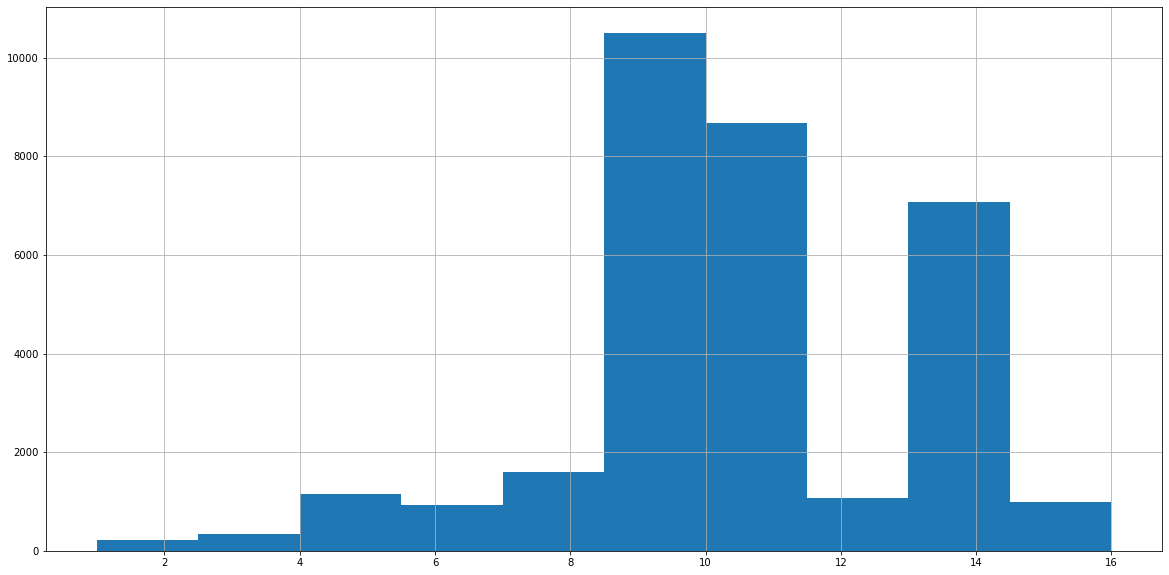

In [34]:
train['Education-Num'].hist();

Dla innych zmiennych (np. kategorialnych) to nie przejdzie i wtedy można zrobić zadanie w ten sposób:

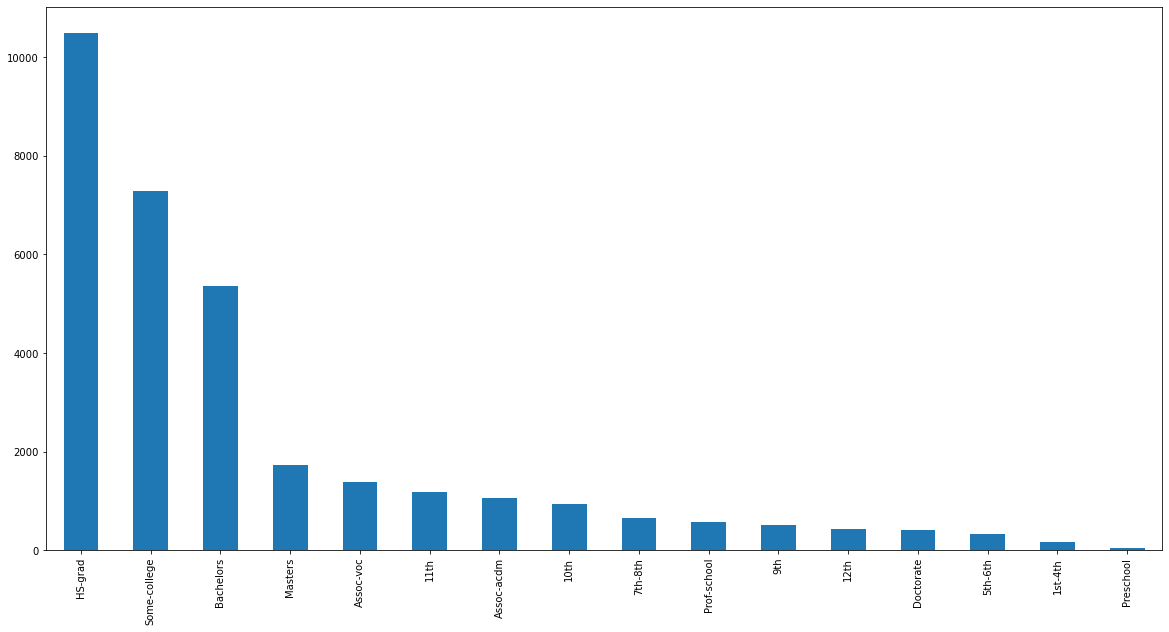

In [35]:
train['Education'].value_counts().plot(kind='bar');

lub można użyć `seaborn`:

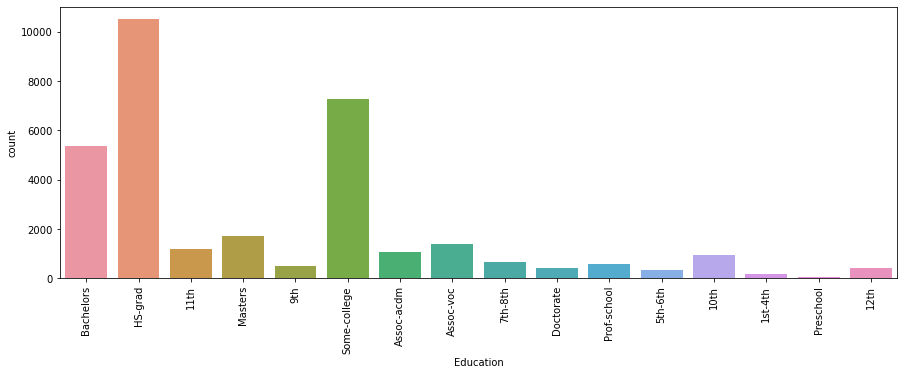

In [36]:
plt.figure(figsize=(15, 5))
sns.countplot(x='Education', data=train);
plt.xticks(rotation=90);

Spróbuj zbadać kolejne cechy, to może być przydatne, żeby zacząć tworzyć lepsze cechy.

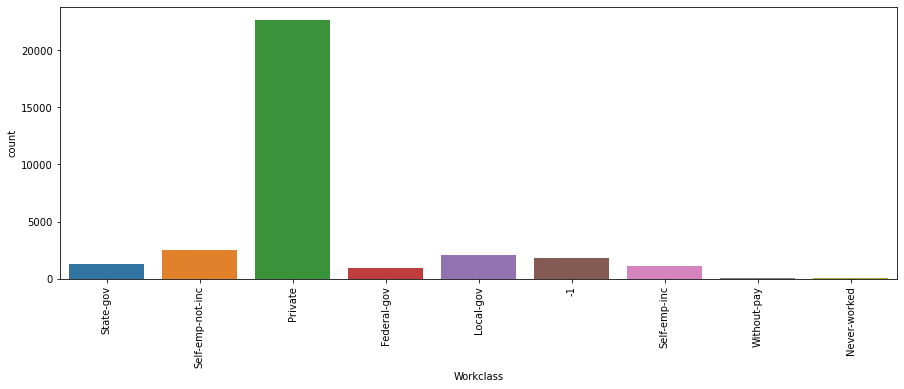

In [37]:
plt.figure(figsize=(15, 5))
sns.countplot(x='Workclass', data=train);
plt.xticks(rotation=90);

Zobaczmy, jak wygląda rozkład danych. To pomoże Ci zobaczyć pewne zależności i zacząć tworzyć kolejne cechy (oparte na kombinacji istniejących cech).

Zaczniemy od zbadania: płci oraz edukacji. Przypominam, że na osi y, jest prawdopodobieństwo, że ta osoba zarobi więcej niż 50k rocznie (1.0 oznacza 100%).

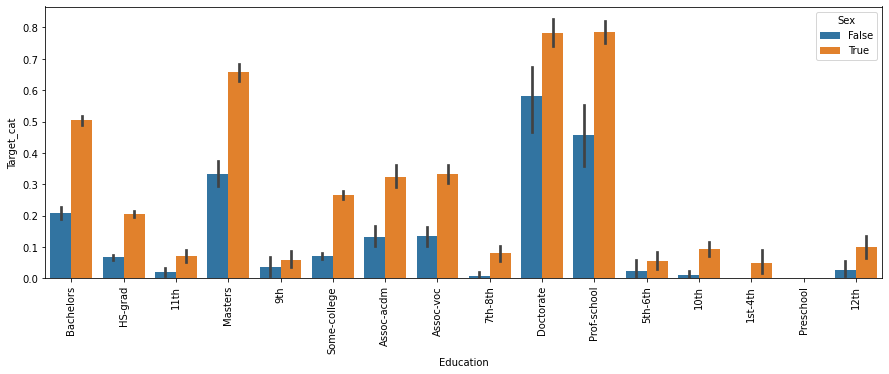

In [38]:
plt.figure(figsize=(15, 5))
sns.barplot(x="Education", y="Target_cat", hue='Sex', data=train)
plt.xticks(rotation=90);

Zbadajmy teraz rasę i płeć.

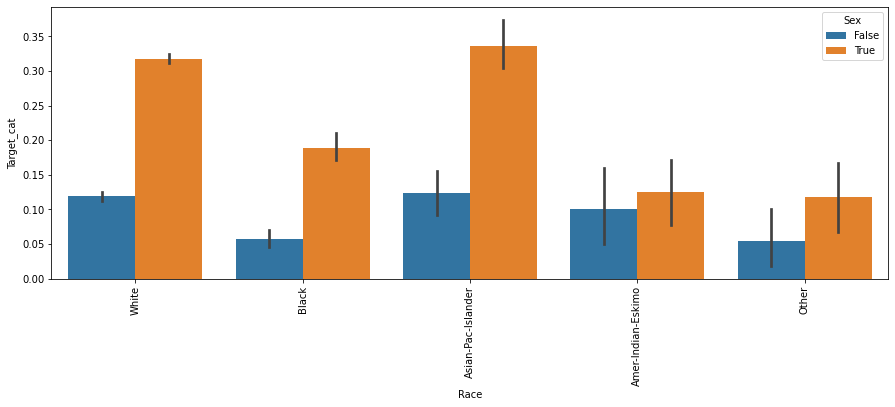

In [39]:
plt.figure(figsize=(15, 5))
sns.barplot(x="Race", y="Target_cat", hue='Sex', data=train)
plt.xticks(rotation=90);

Zbadajmy kraj pochodzenia oraz płeć.

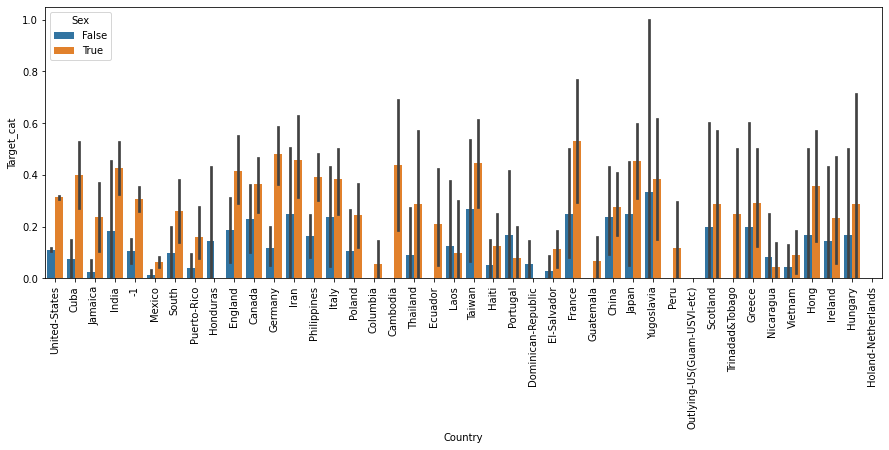

In [40]:
plt.figure(figsize=(15, 5))
sns.barplot(x="Country", y="Target_cat", hue='Sex', data=train)
plt.xticks(rotation=90);

Zbadajmy stan cywilny oraz płeć.

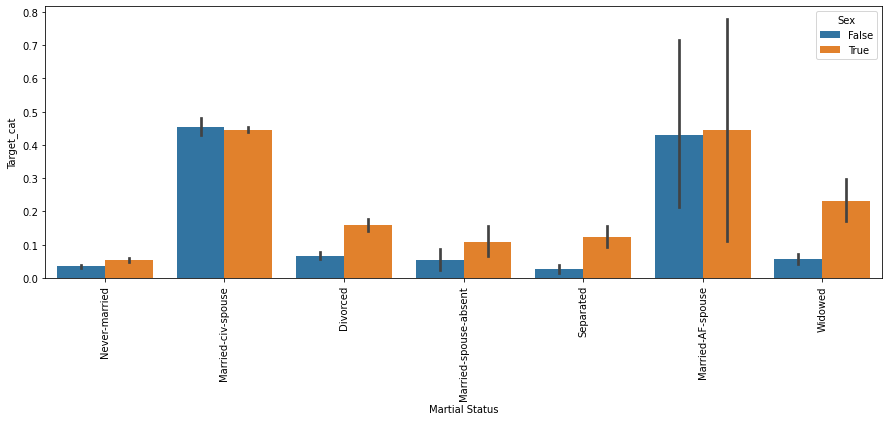

In [41]:
plt.figure(figsize=(15, 5))
sns.barplot(x='Martial Status', y="Target_cat", hue='Sex', data=train)
plt.xticks(rotation=90);

Zbadajmy zawód oraz płeć.

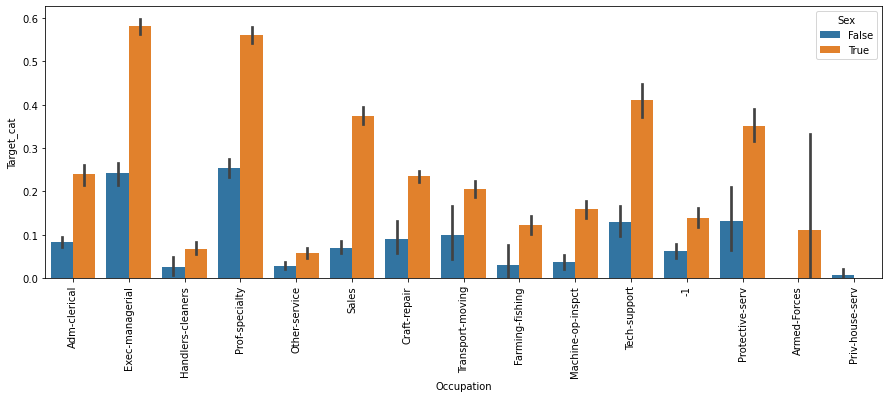

In [42]:
plt.figure(figsize=(15, 5))
sns.barplot(x='Occupation', y="Target_cat", hue='Sex', data=train)
plt.xticks(rotation=90);

Mam nadzieję, że już widać, które grupy wyróżniają się (a to brzmi jako cecha). Tu przy okazji zbadaliśmy temat niesprawiedliwości tego świata. Co jest ważne, model nic nie wie na temat dyskryminacji, jedynie uczy się z tego co jest "myśląc", że to jest normalnie. Stąd właśnie pojawia się bias, zobacz ten [filmik](https://www.youtube.com/watch?v=59bMh59JQDo). Musisz na to uważać! Model staje się tym, czym go karmisz :). Podobnie jak nasz mózg (to co tam wrzucamy, wpływa na to, kim się stajemy później).


Zbadaj teraz jeszcze inne kombinacje np. zamiast płci sprawdzić rasę.

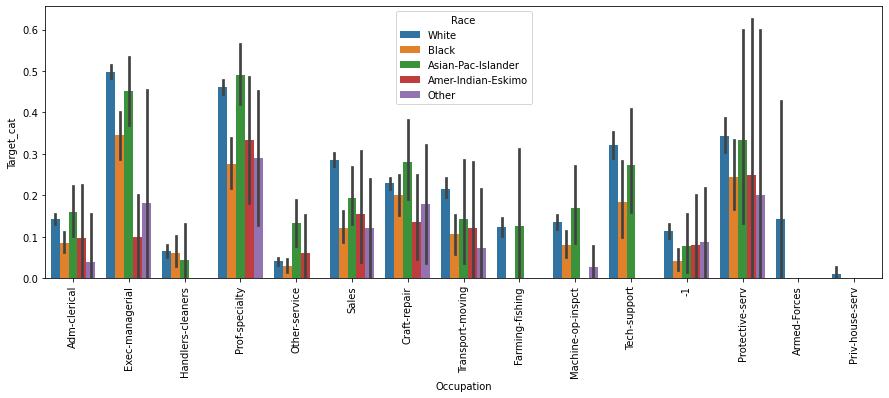

In [43]:
plt.figure(figsize=(15, 5))
sns.barplot(x='Occupation', y="Target_cat", hue='Race', data=train)
plt.xticks(rotation=90);

Zobacz jeszcze jedną wskazówkę co do wizualizacji. Możesz rozbić to na osobne wykresy.

<Figure size 1440x360 with 0 Axes>

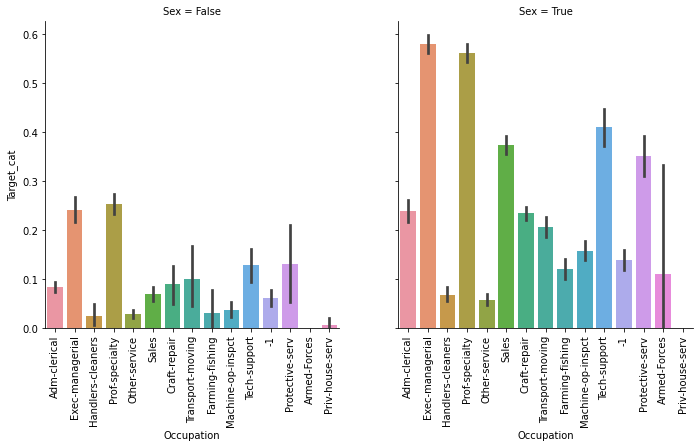

In [44]:
plt.figure(figsize=(20, 5))
g = sns.catplot(x="Occupation", y="Target_cat", col="Sex", data=train, kind="bar")

for ax in g.axes.flatten():
    plt.sca(ax)
    plt.xticks(rotation=90)

Jeśli jest więcej niż 5, to można powiedzieć, ile ma być maksymalnie w jednym wierszu (używając `col_wrap`).

<Figure size 1440x360 with 0 Axes>

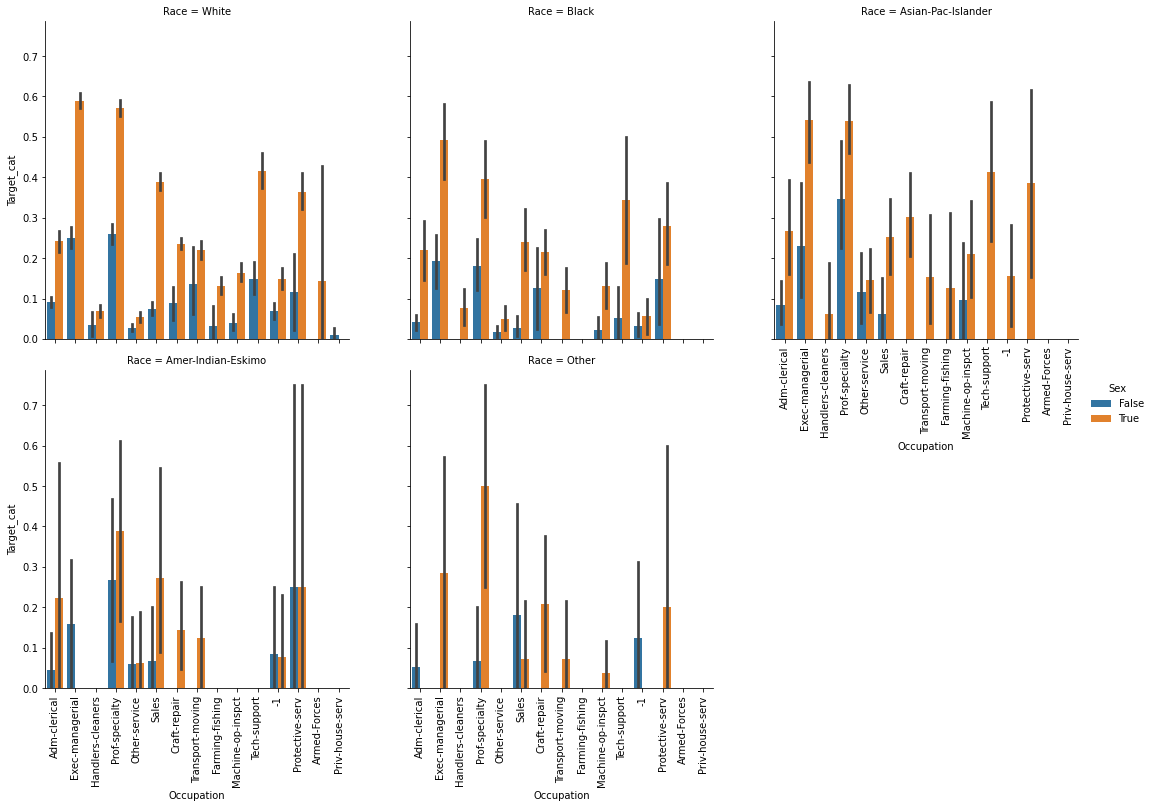

In [45]:
plt.figure(figsize=(20, 5))
g = sns.catplot(x="Occupation", y="Target_cat", hue="Sex", col='Race', col_wrap=3, data=train, kind="bar")

for ax in g.axes.flatten():
    plt.sca(ax)
    plt.xticks(rotation=90)

Zwróć uwagę na czarne pionowe kreski (w słupkach). Traktuj to jak rozrzut danych, jeśli ta kreska jest zbyt zmienna (np. zobacz ostatni wykres), to ciężko cokolwiek wnioskować, bo jest zbyt duża zmienność.

Już sporo wiesz, żeby dalej poruszać się samodzielnie. Spróbuj zrobić następujące rzeczy.

## Zadanie 1.5.3
Dodaj kolejne cechy (*features*) bazując na tych, które już są (np. na podstawie dwóch cech `Relationship` i `Race`, można wykombinować kilka różnych cech, np. `White` + `Husband` lub `Black` + `Husband`).

Moje oczekiwania są takie, że spróbujesz stworzyć kilka czy kilkanaście nowych cech. Od razu powiem, przygotuj się, że często nowa cecha może być mało wartościowa. Natomiast wartością będzie, jeśli nauczysz się szybko iterować hipotezy (czyli odkrywać nowe cechy, które wnoszą wartość poprzez szybkie eksperymenty).

Ciekawostka: być może warto dodać zmienną wagę? Zobacz ten artykuł: [People who are overweight get paid less, according to a new LinkedIn study](https://bit.ly/39njuch)

Daj znać na Slacku, czy udało Ci się sprawdzić tę cechę :) 

In [48]:
train.head()

train.Age.max()

def age_gr(age):
    if age <= 19:
        return 0
    elif age < 25:
        return 1
    elif age < 30:
        return 2
    elif age < 62:
        return 3
    return 4

train['age_gr'] = train['Age'].apply(age_gr)

def age_husb(age_gr, husb):
    if age_gr == 3:
        if husb == 'Husband':
            return 0
        else:
            return 1
    return -1

train['if_husb'] = train.apply(lambda x: age_husb(x.age_gr, x.Relationship), axis = 1)

<Figure size 1440x360 with 0 Axes>

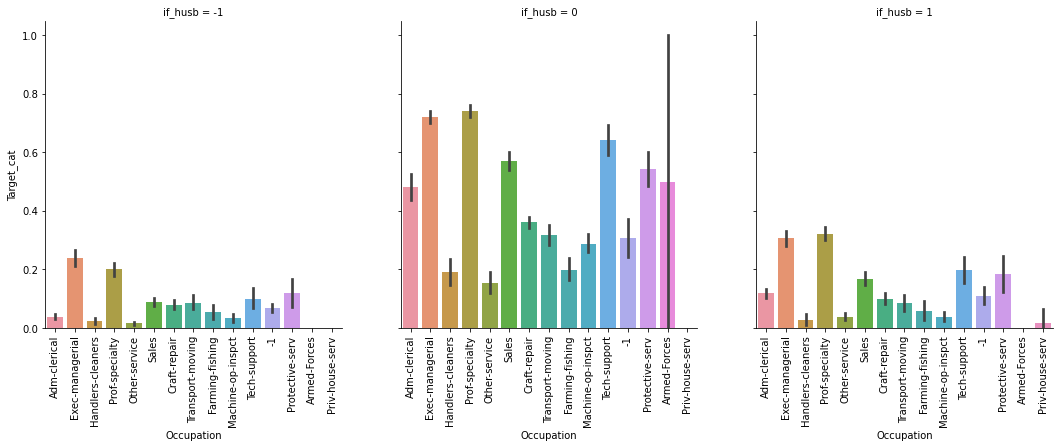

In [50]:
plt.figure(figsize = (20, 5))
g = sns.catplot(x="Occupation", y="Target_cat", col="if_husb", data=train, kind="bar")

for ax in g.axes.flatten():
    plt.sca(ax)
    plt.xticks(rotation=90)

<Figure size 1440x360 with 0 Axes>

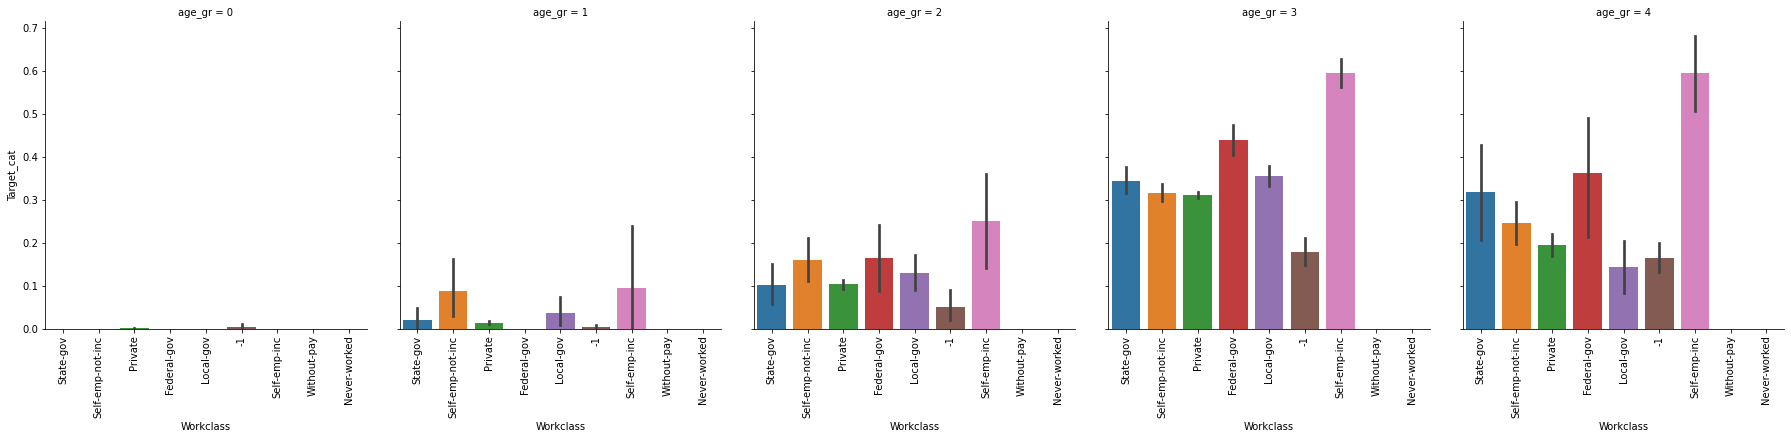

In [51]:
plt.figure(figsize = (20, 5))
g = sns.catplot(x="Workclass", y="Target_cat", col="age_gr", data=train, kind="bar")

for ax in g.axes.flatten():
    plt.sca(ax)
    plt.xticks(rotation=90)

## Zadanie 1.5.4
Zastosuj bardziej złożony model, np. [DecisionTreeClassifier](https://bit.ly/39qD4Vk). Dlaczego akurat ten? Bo jest relatywnie prosty, ale znacznie skuteczniejszy niż `Dummy` model. Więcej o drzewach decyzyjnych będzie w następnych modułach. Dlatego na razie możesz to potraktować jako czarne pudło.

Koniecznie napisz na Slacku, jak już zrobisz to zadanie i podziel się wynikiem. Załącz screen! 

In [54]:
from sklearn.tree import DecisionTreeClassifier

X = train[ ['Workclass_cat', 'Education_cat', 'Martial Status_cat', 'Occupation_cat', 'Relationship_cat', 'Race_cat', 
           'Country_cat', 'age_gr', 'if_husb']].values
y = train['Target_cat'].values

train_and_predict(DecisionTreeClassifier(), X, y, test_size=0.33)

0.8131845634148838

## Przydatne linki:
- [Managing Large Datasets with Python and HDF5](https://bit.ly/31t3HEE)
- [Guide to Encoding Categorical Values in Python](https://bit.ly/2P6fHcJ)
- [Who can earn more than 50K per year?](https://bit.ly/2O2LgDJ)

- [Qgrid is a Jupyter notebook widget](https://bit.ly/3d9BQPe)